<a href="https://colab.research.google.com/github/LuisAcerv/MLAZ/blob/master/clase4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import torch
import numpy as np

import torch.nn as nn
import torch.optim as optim

import matplotlib.pyplot as plt

# Regresión Lineal
---


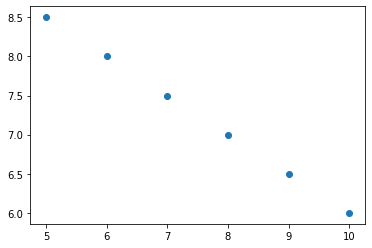

In [2]:
car_prices = [5, 6, 7, 8, 9, 10]
units_sold = [8.5, 8.0, 7.5, 7.0, 6.5, 6.0]

plt.scatter(car_prices, units_sold)

In [5]:
prices_array = np.array(car_prices).reshape(-1, 1)
units_array = np.array(units_sold).reshape(-1, 1)
prices_array, units_array

(array([[ 5],
        [ 6],
        [ 7],
        [ 8],
        [ 9],
        [10]]), array([[8.5],
        [8. ],
        [7.5],
        [7. ],
        [6.5],
        [6. ]]))

In [9]:
prices = torch.from_numpy(prices_array).float().requires_grad_(True)
units = torch.from_numpy(units_array).float()

prices, units

(tensor([[ 5.],
         [ 6.],
         [ 7.],
         [ 8.],
         [ 9.],
         [10.]], requires_grad=True), tensor([[8.5000],
         [8.0000],
         [7.5000],
         [7.0000],
         [6.5000],
         [6.0000]]))

0.0008536551031284034


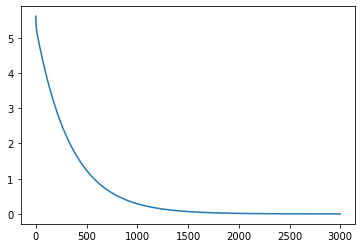

In [16]:
model = nn.Linear(1, 1)
loss_function = nn.MSELoss() 
optimizer = optim.SGD(model.parameters(), lr=0.015) # Stochastic Gradient Descent

losses = []
iterations = 3000

for i in range(iterations):
  # Forward pass
  pred = model(prices)
  loss = loss_function(pred, units)
  
  losses.append(loss.data)

  optimizer.zero_grad()
  
  # Backpropagation
  loss.backward()
  optimizer.step()

print(float(loss))
plt.plot(range(iterations), losses)
